El Nino Data Exploration

            Nino34_SST  Nino34_SSTA
Date                               
1981-09-02        28.3         -0.3
1981-09-09        28.4         -0.2
1981-09-16        28.4         -0.3
1981-09-23        28.2         -0.5
1981-09-30        28.0         -0.6
...                ...          ...
2025-01-01        25.8         -0.7
2025-01-15        25.9         -0.6
2025-01-22        27.5         -0.7
2025-01-29        27.3         -0.8
2025-02-05        25.9         -0.6

[1023 rows x 2 columns]


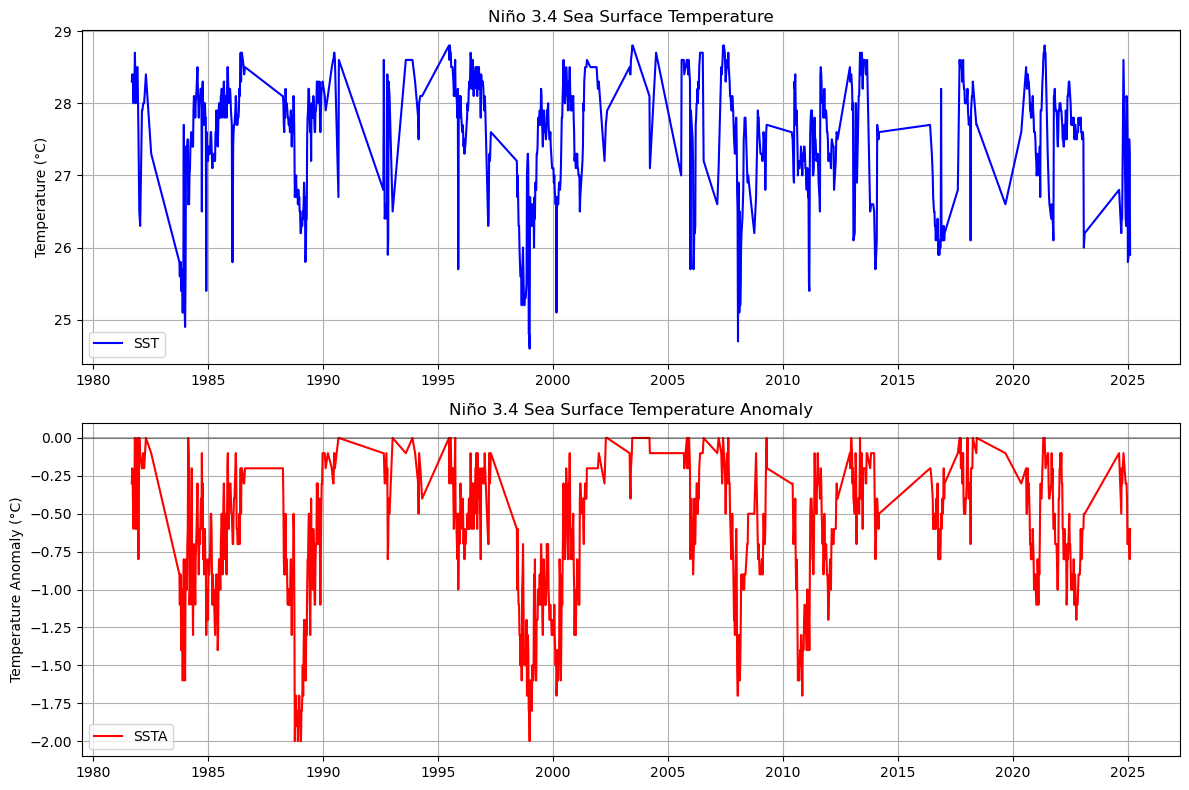


--- Statistics ---
Nino34_SST:
  Mean: 27.54
  Std: 0.82
  Max: 28.80
  Min: 24.60
Nino34_SSTA:
  Mean: -0.68
  Std: 0.44
  Max: -0.00
  Min: -2.00


In [ ]:
import pandas as pd
import re
from datetime import datetime

def parse_el_nino34_data_from_file(file_path):
    """
    Parse El Niño 3.4 region SST data from a text file into a pandas DataFrame.
    
    Parameters:
    file_path (str): Path to the text file containing El Niño SST data
    
    Returns:
    pandas.DataFrame: Parsed data with dates as index and Niño 3.4 SST values and anomalies
    """
    # Read the file content
    with open(file_path, 'r') as file:
        data_string = file.read()
    
    # Split the string into lines and remove empty lines
    lines = [line.strip() for line in data_string.split('\n') if line.strip()]
    
    # Create column names for Niño 3.4 region only
    column_names = ["Nino34_SST", "Nino34_SSTA"]
    
    # Create a list to hold the data
    data_rows = []
    
    # Pattern to match the date in format like "02SEP1981"
    date_pattern = re.compile(r'\d{2}[A-Z]{3}\d{4}')
    
    # Process each data row (starting from the 4th line, skipping headers)
    for line in lines[3:]:
        # Skip any lines that don't contain data
        if not date_pattern.search(line):
            continue
            
        # Split the line into parts
        parts = re.split(r'\s+', line.strip())
        
        # Extract the date
        date_str = parts[0]
        
        # Parse the date
        try:
            date = datetime.strptime(date_str, "%d%b%Y")
        except ValueError:
            # If there's an issue with the date format, keep it as a string
            date = date_str
        
        # In the data format, Niño 3.4 is the third region (after Niño1+2 and Niño3)
        # So we need to extract the 5th value (index 4 in 0-based indexing) if parts are separated
        if len(parts) >= 5:
            nino34_value = parts[4]
            
            # Use regex to separate SST and SSTA
            match = re.match(r'(\d+\.\d+)([-+]\d+\.\d+)', nino34_value)
            if match:
                sst = float(match.group(1))
                ssta = float(match.group(2))
                data_rows.append([date, sst, ssta])
    
    # Create a DataFrame from the data
    df = pd.DataFrame(data_rows, columns=['Date'] + column_names)
    
    # Set the date column as the index
    df.set_index('Date', inplace=True)
    
    return df

file_path = "/Users/jenniferzhang/Desktop/24_25/quantsc/noaa_elnino_data.txt"
df = parse_el_nino34_data_from_file(file_path)

# Display the DataFrame
print(df)

# You can also save the processed data to a CSV file if needed
# df.to_csv("nino34_data.csv")

# If you want to plot the data
import matplotlib.pyplot as plt

def plot_nino34_data(df):
    """
    Plot the Niño 3.4 SST and SSTA data.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with Niño 3.4 data
    """
    plt.figure(figsize=(12, 8))
    
    # Plot SST
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Nino34_SST'], 'b-', label='SST')
    plt.title('Niño 3.4 Sea Surface Temperature')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    
    # Plot SSTA
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['Nino34_SSTA'], 'r-', label='SSTA')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.title('Niño 3.4 Sea Surface Temperature Anomaly')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Uncomment the line below to plot the data
plot_nino34_data(df)

def calculate_statistics(df):
    """
    Calculate statistics for the Niño 3.4 SST and SSTA data.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with Niño 3.4 data
    
    Returns:
    dict: Dictionary containing mean, standard deviation, maximum, and minimum values
    """
    stats = {
        'Nino34_SST': {
            'mean': df['Nino34_SST'].mean(),
            'std': df['Nino34_SST'].std(),
            'max': df['Nino34_SST'].max(),
            'min': df['Nino34_SST'].min()  # Added min calculation
        },
        'Nino34_SSTA': {
            'mean': df['Nino34_SSTA'].mean(),
            'std': df['Nino34_SSTA'].std(),
            'max': df['Nino34_SSTA'].max(),
            'min': df['Nino34_SSTA'].min()  # Added min calculation
        }
    }
    
    return stats

# Calculate statistics and print in formatted way
statistics = calculate_statistics(df)
print("\n--- Statistics ---")
for key, value in statistics.items():
    print(f"{key}:")
    for stat, val in value.items():
        print(f"  {stat.capitalize()}: {val:.2f}")



Nasdaq US Smart Food & Beverage Index (NQSSFB) Data Exploration

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats

file_path = "/Users/jenniferzhang/Desktop/24_25/quantsc/EODHist_NQSSFB.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Assuming your "Index Value" column is labeled 'Index Value'
# Replace 'Index Value' with the actual column name if different
index_data = df['Index Value']

# Basic statistics
min_value = index_data.min()
max_value = index_data.max()
mean_value = index_data.mean()
std_dev = index_data.std()

# Stationarity Tests - ADF (Augmented Dickey-Fuller) Test
def adf_test(data):
    result = adfuller(data)
    return result[1]  # p-value from ADF test

# KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)
def kpss_test(data):
    result = kpss(data, regression='c', nlags='auto')
    return result[1]  # p-value from KPSS test

# Normality Tests - Jarque-Bera Test (JB)
def jarque_bera_test(data):
    stat, p_value = stats.jarque_bera(data)
    return p_value  # p-value from JB test

# Shapiro-Wilk Test (SW test)
def shapiro_wilk_test(data):
    stat, p_value = stats.shapiro(data)
    return p_value  # p-value from SW test

# Calculate the stationarity and normality tests
adf_p_value = adf_test(index_data)
kpss_p_value = kpss_test(index_data)
jb_p_value = jarque_bera_test(index_data)
sw_p_value = shapiro_wilk_test(index_data)

# Display the results
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print("\nStationarity Tests:")
print(f"ADF test p-value: {adf_p_value}")
print(f"KPSS test p-value: {kpss_p_value}")
print("\nNormality Tests:")
print(f"Jarque-Bera test p-value: {jb_p_value}")
print(f"Shapiro-Wilk test p-value: {sw_p_value}")


Min: 0.0
Max: 1368.36315494362
Mean: 1077.8388287206928
Standard Deviation: 136.46466292633232

Stationarity Tests:
ADF test p-value: 0.42141752952659595
KPSS test p-value: 0.01

Normality Tests:
Jarque-Bera test p-value: 0.0005796559658123418
Shapiro-Wilk test p-value: 4.511647628381748e-33


/var/folders/67/h8sd_kq174q8_dssmqdyscw00000gn/T/ipykernel_87957/275072142.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data, regression='c', nlags='auto')


MSCI agricultural & FC index (M2WO0AGF) Data Exploration

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats

file_path = "/Users/jenniferzhang/Desktop/24_25/quantsc/MSCI.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Assuming your "Index Value" column is labeled 'Index Value'
# Replace 'Index Value' with the actual column name if different
index_data = df['Index Value']

# Basic statistics
min_value = index_data.min()
max_value = index_data.max()
mean_value = index_data.mean()
std_dev = index_data.std()

# Stationarity Tests - ADF (Augmented Dickey-Fuller) Test
def adf_test(data):
    result = adfuller(data)
    return result[1]  # p-value from ADF test

# KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)
def kpss_test(data):
    result = kpss(data, regression='c', nlags='auto')
    return result[1]  # p-value from KPSS test

# Normality Tests - Jarque-Bera Test (JB)
def jarque_bera_test(data):
    stat, p_value = stats.jarque_bera(data)
    return p_value  # p-value from JB test

# Shapiro-Wilk Test (SW test)
def shapiro_wilk_test(data):
    stat, p_value = stats.shapiro(data)
    return p_value  # p-value from SW test

# Calculate the stationarity and normality tests
adf_p_value = adf_test(index_data)
kpss_p_value = kpss_test(index_data)
jb_p_value = jarque_bera_test(index_data)
sw_p_value = shapiro_wilk_test(index_data)

# Display the results
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print("\nStationarity Tests:")
print(f"ADF test p-value: {adf_p_value}")
print(f"KPSS test p-value: {kpss_p_value}")
print("\nNormality Tests:")
print(f"Jarque-Bera test p-value: {jb_p_value}")
print(f"Shapiro-Wilk test p-value: {sw_p_value}")


S&P food and beverage select industry index (SPSIFBN) Data Exploration

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import jarque_bera, shapiro

file_path = "/Users/jenniferzhang/Desktop/24_25/quantsc/INDEX_XX_S&P.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Ensure numeric columns are converted properly (remove commas)
numeric_columns = ['Open', 'High', 'Low', 'Close']
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric)

# Compute Basic Statistics
summary_stats = {
    "Metric": ["Min", "Max", "Mean", "Standard Deviation"],
    "Open": [df['Open'].min(), df['Open'].max(), df['Open'].mean(), df['Open'].std()],
    "High": [df['High'].min(), df['High'].max(), df['High'].mean(), df['High'].std()],
    "Low": [df['Low'].min(), df['Low'].max(), df['Low'].mean(), df['Low'].std()],
    "Close": [df['Close'].min(), df['Close'].max(), df['Close'].mean(), df['Close'].std()],
}

# Convert summary stats to DataFrame
stats_df = pd.DataFrame(summary_stats)

# Stationarity Tests (ADF Test, Phillips-Perron Test)
def stationarity_tests(series):
    adf_test = adfuller(series, autolag='AIC')[1]  # ADF test p-value
    kpss_test = kpss(series, regression='c', nlags='auto')[1]  # KPSS test p-value
    return adf_test, kpss_test

# Perform stationarity tests on the Close price
adf_pval, kpss_pval = stationarity_tests(df['Close'])

# Normality Tests (Jarque-Bera, Shapiro-Wilk)
jb_pval = jarque_bera(df['Close'])[1]  # JB test p-value
sw_pval = shapiro(df['Close'])[1]  # SW test p-value

# Display Results
print("===== Summary Statistics =====")
print(stats_df)
print("\n===== Stationarity Tests =====")
print(f"ADF Test p-value: {adf_pval:.5f} (p < 0.05 suggests stationarity)")
print(f"KPSS Test p-value: {kpss_pval:.5f} (p > 0.05 suggests stationarity)")
print("\n===== Normality Tests =====")
print(f"Jarque-Bera Test p-value: {jb_pval:.5f} (p > 0.05 suggests normality)")
print(f"Shapiro-Wilk Test p-value: {sw_pval:.5f} (p > 0.05 suggests normality)")


===== Summary Statistics =====
               Metric         Open         High          Low        Close
0                 Min  6972.130000  6972.130000  6972.130000  6972.130000
1                 Max  7819.550000  7819.550000  7819.550000  7819.550000
2                Mean  7387.671195  7387.671195  7387.671195  7387.670717
3  Standard Deviation   182.608980   182.608980   182.608980   182.608776

===== Stationarity Tests =====
ADF Test p-value: 0.08056 (p < 0.05 suggests stationarity)
KPSS Test p-value: 0.09945 (p > 0.05 suggests stationarity)

===== Normality Tests =====
Jarque-Bera Test p-value: 0.11749 (p > 0.05 suggests normality)
Shapiro-Wilk Test p-value: 0.01960 (p > 0.05 suggests normality)
